In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch

from sklearn.cluster import KMeans

In [66]:
#import data
df = pd.read_csv('kmeanstutorial.csv')

In [68]:
df = df[['team','type','location','pass_end_location']]
df = df[(df['team']=='France')&(df['type']=='Pass')].reset_index()

In [69]:
df[['x','y']] = df.location.str.split(expand=True)
df[['endX','endY']] = df.pass_end_location.str.split(expand=True)
df['x'] = df.loc[:,'x'] = df.x.map(lambda x: x[1:-1]).astype(float)
df['y'] = df.loc[:,'y'] = df.y.map(lambda x: x[0:-1]).astype(float)
df['endX'] = df.loc[:,'endX'] = df.endX.map(lambda x: x[1:-1]).astype(float)
df['endY'] = df.loc[:,'endY'] = df.endY.map(lambda x: x[0:-1]).astype(float)
df = df.drop(['location','pass_end_location'],axis=1)

In [70]:
X = np.array(df[['x','y','endX','endY']])
kmeans = KMeans(n_clusters = 10,random_state=100)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

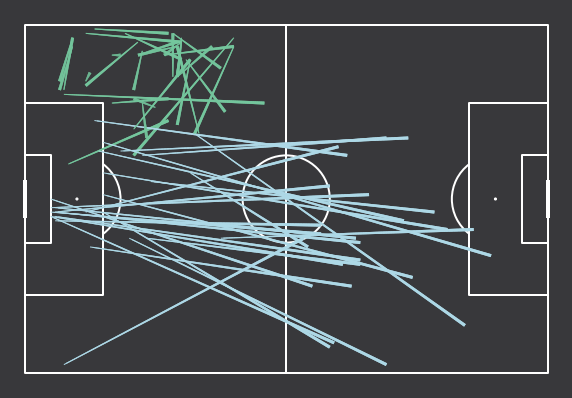

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch = Pitch(pitch_type='statsbomb',
             pitch_color='#38383b',line_color='white'
            )

pitch.draw(ax=ax)

for x in range(len(df['cluster'])):
    
    if df['cluster'][x] ==0:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
        
    if df['cluster'][x] ==5:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#add8e6',lw=3,zorder=2,comet=True,ax=ax)